# Predicting heart disease using machine learning 

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a 
machine learning model capable of predicting  whether or not someone has heart disease based 

We're going to take the following approach:
1. problem defination 
2. Data
3. Evaluation 
4. Features
5. Modelling 
6. Experimentation

## 1.Problem Defination 
 
In a statement,
> Given clinical paramerter about a patient, can we predict wheather or not they have heart disease

## 2.Data

The original data came from the Cleavland data from the UCI machine learning repositary:https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> If we can reach 95% accuracy at predicting weather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
   -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


In [1]:
#Import the tools 

#Regular EDA(exploratory data analysis) and plotting libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#we want our place to appear inside the notebook
%matplotlib inline

#model from sklearn  
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df=pd.read_csv("heart-disease (1).csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve.
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. where are  the outliners and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

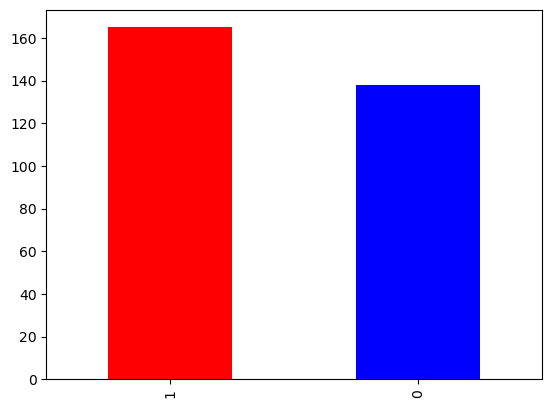

In [7]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare the target colun with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


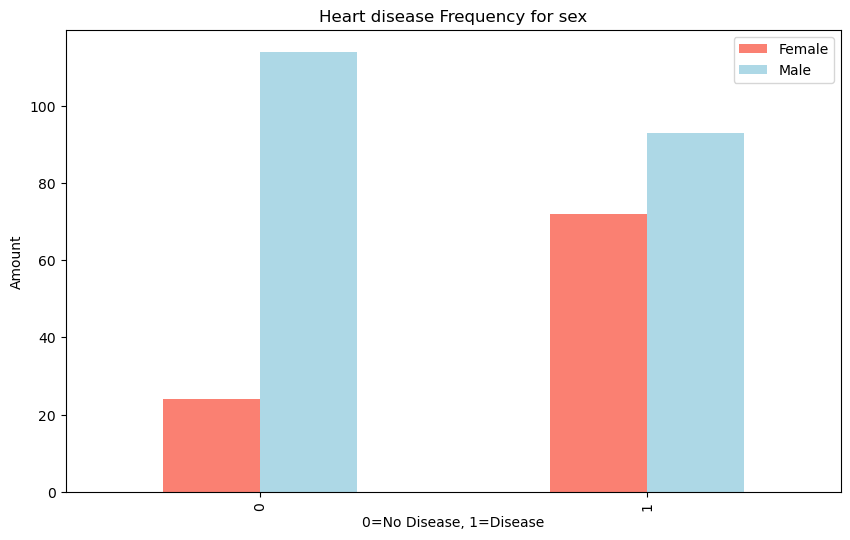

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=[10,6],color=["salmon","lightblue"]);
plt.title("Heart disease Frequency for sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

### Age vs. Max Heart Rate for Heart Disease

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


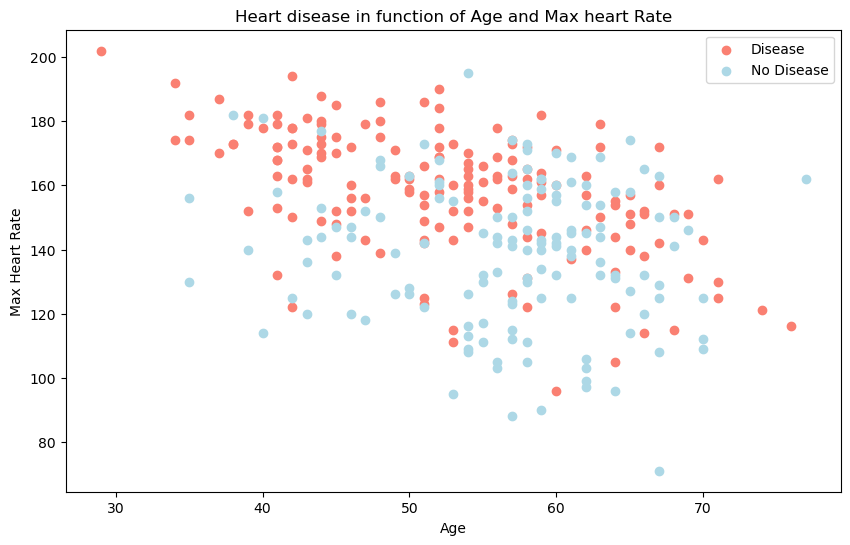

In [14]:
#create another figure
plt .figure(figsize=(10,6))

#Scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#Scatter with neagative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#laballing the graph
plt.title("Heart disease in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

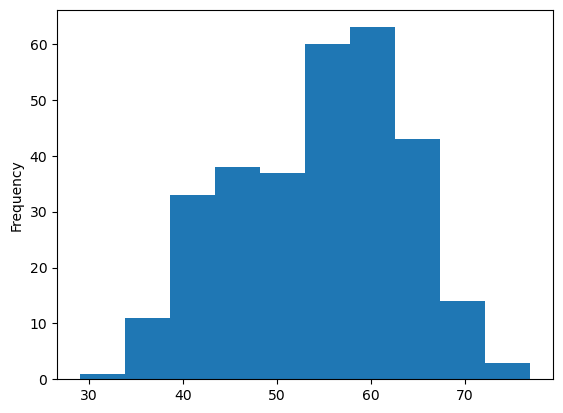

In [15]:
df.age.plot.hist();

### Heart Disease Frequency per Chest pain type 

3. cp-chest pain type
  * 0:Typical angina:chest pain releted decrease blood supply to the heart
  * 1: Atypical angina:chest pain not releted to heart.
  * 2:Non-angina pain:typically esophageal spasms(non heart releted)
  * 3.Asymptomatic:chest pain not showing signs of disease.
  
    
    

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


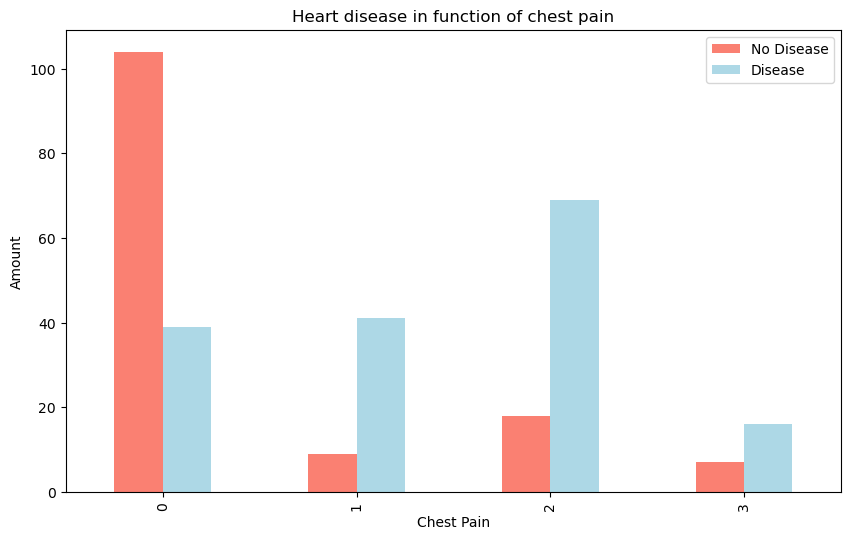

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

#labaling the graph
plt.title("Heart disease in function of chest pain")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [18]:
#make correaltion matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

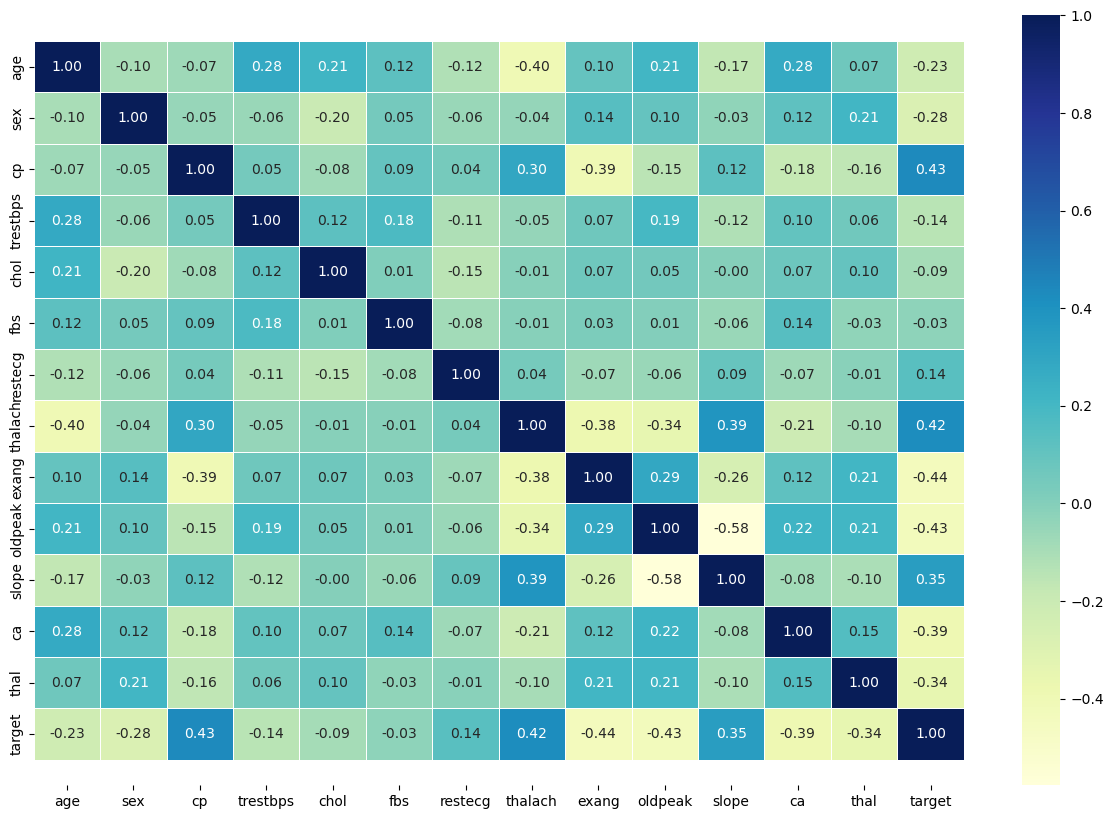

In [19]:
#lets make our correlation metrix more communicatve 
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

bottom,top=ax.get_ylim()

ax.set_ylim(bottom+0.5,top-0.5)

In [20]:
#split the data
x=df.drop("target",axis=1)
y=df["target"]

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y,len(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303)

In [23]:
#randmize the data
np.random.seed(42)
#split the data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Now we have got our split data into training and test set,it's time to build a machine learning model.

we'll train it(find the pattern) on the traning set.

And we'll test it(use the pattern) on the test set.

we are going to try 3 different machien learing models:
  1. Logistics Regression
  2. K-Nearest Neighobours Classifier
  3. Random Forest Classifier

In [24]:
#put the model in dictionary
models={"Logistic Rgression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#creat a function to fit and score the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluate given machine learning models.
    models:a dict of different scikitlearn machine learning models.
    x_train:training a data (no labels)
    x_test:testing a data (no labels)
    y_train:training labels.
    y_test:test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #fit the model to the data.
        model.fit(x_train ,y_train)
        #evluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    



In [25]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\chann\OneDrive\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Rgression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparision 

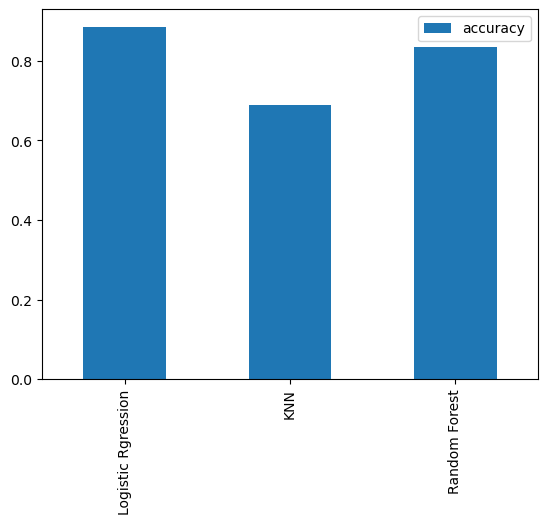

In [26]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got baseline model... and we know a model's first
prediction aren't always what we should based our next steps off.
what sould do?

Les's look at the following:

* Hyperparameter tunning.
* Feature importance
* Confusion matrix
* cross validation 
* preision
* recall
* F1 score
* ROC curve 
* Area under curve (AUC)


In [27]:
#lets train the KNN

train_score=[]
test_score=[]

#create the list of different values for n_neighbores
neighbors=range(1,21)

#setup KNN instance 
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the traning scores list
    train_score.append(knn.score(x_train,y_train))
    
    #update the test score list
    test_score.append(knn.score(x_test,y_test))
    

In [28]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.40983606557377


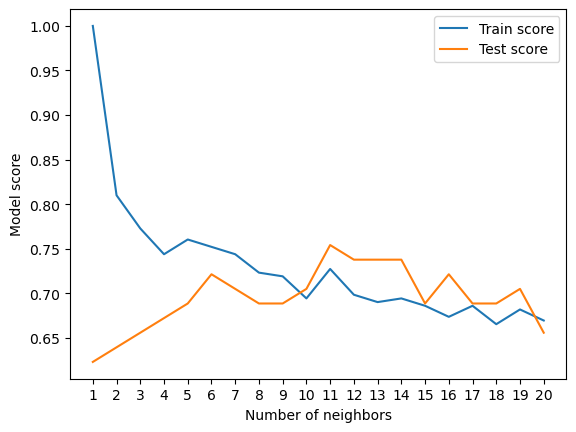

In [30]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print("Maximum KNN score on the test data:", max(test_score)*100)

## Hyperparameter tuning with RandmizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

...using RandomizeSearchCV

In [31]:
#create the hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#Create a hyperparameter grd for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

RandomForestClassifier()

RandomForestClassifier()

Now we have got hyperparameter grids setup for each of our models,let's tune them using  
RandomizedSearchCV...

In [32]:
#Tune LogisticRgression 
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression 
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#fit the hyperparameter search modelfor logisticregression 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Now we have done the hyperparameter with randomizedsearchcv for logisticsearch now lets do the same for the
the randomforestclassifier


In [35]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [37]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameter Tuning with GridSearchCV

since our LogisticRgression model provide the best scores so far, we'll
try and improve them again using GridSearchCV

In [38]:
#different hyperparameter for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                   param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy

* ROC curve and AUC score
* Confusion matrix 
* Classification report 
* precision 
* recall 
* F1-score

...and it would be great if cross-validation was used where possible.

To make comparision and evaluate our trained model, first we need to make prediction. 

In [41]:
#make prediction with tuned model
y_pred=gs_log_reg.predict(x_test)
y_pred    

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
#RocCurveDisplay(gs_log_reg, x_test,y_test)

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 4 were given

In [43]:
#confusion matrix 
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


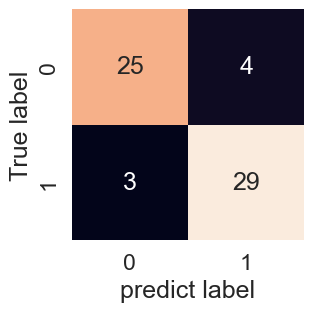

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                  annot=True,
                  cbar=False)
    
    plt.xlabel("predict label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_pred)    

Now we've got a ROC curve ,an AUC metric and confusion matrix,lets's 
get a classification report as well as cross-validation precision,recall and f1-score

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###  Calculation evaluatiion metrics using cross_validation 

We're going to calculate precision,recall and f1-score of our model 
using cross-validation and to do so we'll be using `cross-validation-score` 

In [46]:
#get the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
#create a new classifier with best parameter 
lg=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [48]:
#accuracy score
cv_acc=cross_val_score(lg,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc


0.8446994535519124

In [49]:
#recall score in cross validation score 
cv_recall=cross_val_score(lg,x,y,scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.9212121212121213

In [50]:
#precision score in cross vallidatio score 
cv_prec=cross_val_score(lg,x,y,scoring="precision")
cv_prec=cv_prec.mean()
cv_prec

0.8207936507936507

In [51]:
#f1_score in cross validation score 
cv_f1=cross_val_score(lg,x,y,scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-Vlaidation Classification metrics'}>

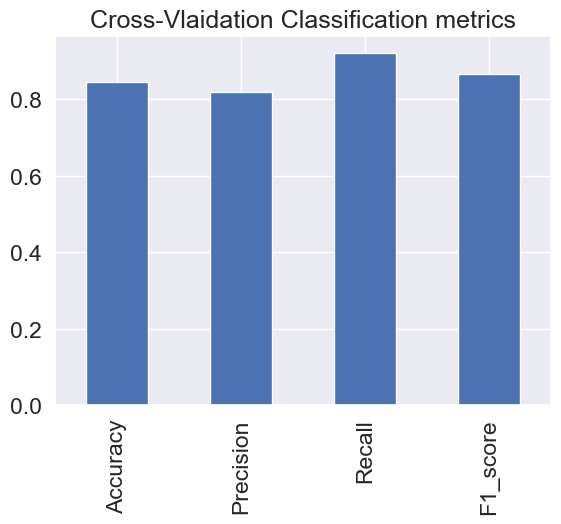

In [52]:
#visulized cross validation score 
cv_metrics =pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_prec,
                        "Recall":cv_recall,
                        "F1_score":cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross-Vlaidation Classification metrics",
                     legend=False)

## Feature importance 

Featue importance is another as asking, "which feature contributed most to the outcomes to the model how did they contribute?"

Finding feature importance is different for each machine learning model

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
#Fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(x_train,y_train);

In [55]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [56]:
#match coef's of features to columns 
Feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
Feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

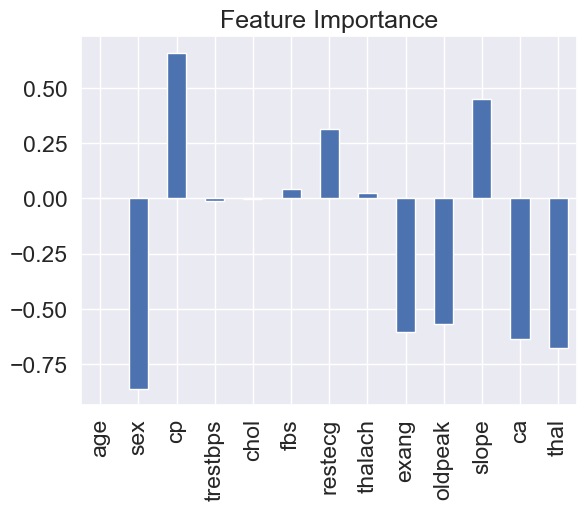

In [57]:
Feature_df=pd.DataFrame(Feature_dict, index=[0])
Feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [58]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


## 6 Expremenattion 
 
If you haven't hit evlution metrics yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost  or XGBoost?
* Could you improve the current models?(beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metrics) how would you export it and share it with other?

In [59]:
#importing the catboost library for improving the model 
from catboost import CatBoostClassifier 

In [60]:
cat_clf=CatBoostClassifier()
cat_result=cat_clf.fit(x_train,y_train)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 161ms	remaining: 2m 41s
1:	learn: 0.6846994	total: 168ms	remaining: 1m 23s
2:	learn: 0.6804470	total: 173ms	remaining: 57.5s
3:	learn: 0.6762242	total: 178ms	remaining: 44.4s
4:	learn: 0.6716784	total: 184ms	remaining: 36.6s
5:	learn: 0.6672808	total: 189ms	remaining: 31.4s
6:	learn: 0.6639958	total: 195ms	remaining: 27.7s
7:	learn: 0.6601980	total: 202ms	remaining: 25s
8:	learn: 0.6563766	total: 206ms	remaining: 22.7s
9:	learn: 0.6525103	total: 209ms	remaining: 20.7s
10:	learn: 0.6483670	total: 212ms	remaining: 19.1s
11:	learn: 0.6448827	total: 215ms	remaining: 17.7s
12:	learn: 0.6412767	total: 217ms	remaining: 16.5s
13:	learn: 0.6374286	total: 219ms	remaining: 15.4s
14:	learn: 0.6335427	total: 222ms	remaining: 14.6s
15:	learn: 0.6288052	total: 224ms	remaining: 13.8s
16:	learn: 0.6250489	total: 226ms	remaining: 13.1s
17:	learn: 0.6209495	total: 229ms	remaining: 12.5s
18:	learn: 0.6181899	total: 231ms	remaining: 11.9s
19:	learn: 

203:	learn: 0.3211197	total: 594ms	remaining: 2.32s
204:	learn: 0.3207440	total: 597ms	remaining: 2.31s
205:	learn: 0.3199465	total: 599ms	remaining: 2.31s
206:	learn: 0.3191743	total: 601ms	remaining: 2.3s
207:	learn: 0.3183277	total: 603ms	remaining: 2.29s
208:	learn: 0.3175781	total: 605ms	remaining: 2.29s
209:	learn: 0.3167503	total: 607ms	remaining: 2.28s
210:	learn: 0.3161683	total: 609ms	remaining: 2.28s
211:	learn: 0.3153324	total: 611ms	remaining: 2.27s
212:	learn: 0.3147977	total: 613ms	remaining: 2.27s
213:	learn: 0.3140384	total: 615ms	remaining: 2.26s
214:	learn: 0.3134157	total: 618ms	remaining: 2.25s
215:	learn: 0.3124251	total: 620ms	remaining: 2.25s
216:	learn: 0.3119032	total: 622ms	remaining: 2.24s
217:	learn: 0.3111628	total: 624ms	remaining: 2.24s
218:	learn: 0.3106289	total: 626ms	remaining: 2.23s
219:	learn: 0.3096439	total: 628ms	remaining: 2.23s
220:	learn: 0.3087572	total: 630ms	remaining: 2.22s
221:	learn: 0.3080645	total: 633ms	remaining: 2.22s
222:	learn: 0

397:	learn: 0.2236989	total: 978ms	remaining: 1.48s
398:	learn: 0.2235183	total: 981ms	remaining: 1.48s
399:	learn: 0.2230596	total: 983ms	remaining: 1.47s
400:	learn: 0.2227511	total: 985ms	remaining: 1.47s
401:	learn: 0.2224446	total: 987ms	remaining: 1.47s
402:	learn: 0.2220862	total: 988ms	remaining: 1.46s
403:	learn: 0.2216683	total: 990ms	remaining: 1.46s
404:	learn: 0.2212574	total: 992ms	remaining: 1.46s
405:	learn: 0.2210520	total: 994ms	remaining: 1.45s
406:	learn: 0.2206644	total: 996ms	remaining: 1.45s
407:	learn: 0.2204110	total: 998ms	remaining: 1.45s
408:	learn: 0.2199871	total: 1s	remaining: 1.45s
409:	learn: 0.2197389	total: 1s	remaining: 1.44s
410:	learn: 0.2194104	total: 1s	remaining: 1.44s
411:	learn: 0.2192345	total: 1.01s	remaining: 1.44s
412:	learn: 0.2189914	total: 1.01s	remaining: 1.43s
413:	learn: 0.2188487	total: 1.01s	remaining: 1.43s
414:	learn: 0.2183329	total: 1.01s	remaining: 1.43s
415:	learn: 0.2179774	total: 1.01s	remaining: 1.42s
416:	learn: 0.2174186

574:	learn: 0.1747539	total: 1.34s	remaining: 993ms
575:	learn: 0.1745199	total: 1.35s	remaining: 993ms
576:	learn: 0.1742043	total: 1.35s	remaining: 993ms
577:	learn: 0.1738340	total: 1.36s	remaining: 993ms
578:	learn: 0.1736564	total: 1.36s	remaining: 993ms
579:	learn: 0.1734342	total: 1.37s	remaining: 992ms
580:	learn: 0.1730258	total: 1.38s	remaining: 992ms
581:	learn: 0.1727580	total: 1.38s	remaining: 992ms
582:	learn: 0.1725132	total: 1.39s	remaining: 992ms
583:	learn: 0.1723444	total: 1.39s	remaining: 992ms
584:	learn: 0.1721916	total: 1.4s	remaining: 992ms
585:	learn: 0.1720102	total: 1.4s	remaining: 992ms
586:	learn: 0.1716866	total: 1.41s	remaining: 991ms
587:	learn: 0.1715266	total: 1.41s	remaining: 991ms
588:	learn: 0.1713855	total: 1.42s	remaining: 991ms
589:	learn: 0.1710948	total: 1.42s	remaining: 990ms
590:	learn: 0.1708467	total: 1.43s	remaining: 990ms
591:	learn: 0.1706715	total: 1.44s	remaining: 989ms
592:	learn: 0.1704347	total: 1.44s	remaining: 989ms
593:	learn: 0.

798:	learn: 0.1330072	total: 1.92s	remaining: 483ms
799:	learn: 0.1328775	total: 1.92s	remaining: 481ms
800:	learn: 0.1327155	total: 1.93s	remaining: 479ms
801:	learn: 0.1325859	total: 1.93s	remaining: 476ms
802:	learn: 0.1324660	total: 1.93s	remaining: 473ms
803:	learn: 0.1321868	total: 1.93s	remaining: 471ms
804:	learn: 0.1320399	total: 1.93s	remaining: 468ms
805:	learn: 0.1318822	total: 1.94s	remaining: 466ms
806:	learn: 0.1316557	total: 1.94s	remaining: 463ms
807:	learn: 0.1315612	total: 1.94s	remaining: 461ms
808:	learn: 0.1314292	total: 1.94s	remaining: 458ms
809:	learn: 0.1313618	total: 1.94s	remaining: 456ms
810:	learn: 0.1312125	total: 1.94s	remaining: 453ms
811:	learn: 0.1310585	total: 1.95s	remaining: 451ms
812:	learn: 0.1308586	total: 1.95s	remaining: 448ms
813:	learn: 0.1307935	total: 1.95s	remaining: 446ms
814:	learn: 0.1305831	total: 1.95s	remaining: 443ms
815:	learn: 0.1304437	total: 1.95s	remaining: 440ms
816:	learn: 0.1302982	total: 1.96s	remaining: 438ms
817:	learn: 

In [61]:
cat_clf.score(x_test,y_test)

0.8360655737704918

In [62]:
from catboost import CatBoostClassifier

np.random.seed(42)

x=df.drop("target", axis=1)
y=df["target"]

x_train,x_test,y_tarin,y_test=train_test_split(x,y,test_size=0.2)

model=CatBoostClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 2.34ms	remaining: 2.34s
1:	learn: 0.6846994	total: 4.36ms	remaining: 2.17s
2:	learn: 0.6804470	total: 6.35ms	remaining: 2.11s
3:	learn: 0.6762242	total: 8.33ms	remaining: 2.07s
4:	learn: 0.6716784	total: 10.5ms	remaining: 2.08s
5:	learn: 0.6672808	total: 12.5ms	remaining: 2.07s
6:	learn: 0.6639958	total: 14.5ms	remaining: 2.06s
7:	learn: 0.6601980	total: 16.5ms	remaining: 2.04s
8:	learn: 0.6563766	total: 18.5ms	remaining: 2.03s
9:	learn: 0.6525103	total: 20.7ms	remaining: 2.05s
10:	learn: 0.6483670	total: 23.1ms	remaining: 2.08s
11:	learn: 0.6448827	total: 25.7ms	remaining: 2.12s
12:	learn: 0.6412767	total: 28ms	remaining: 2.12s
13:	learn: 0.6374286	total: 29.9ms	remaining: 2.11s
14:	learn: 0.6335427	total: 32ms	remaining: 2.1s
15:	learn: 0.6288052	total: 33.9ms	remaining: 2.09s
16:	learn: 0.6250489	total: 36.1ms	remaining: 2.08s
17:	learn: 0.6209495	total: 38.1ms	remaining: 2.08s
18:	learn: 0.6181899	total: 40.1ms	remaining: 2.0

229:	learn: 0.3029137	total: 555ms	remaining: 1.86s
230:	learn: 0.3023233	total: 557ms	remaining: 1.85s
231:	learn: 0.3019126	total: 559ms	remaining: 1.85s
232:	learn: 0.3011656	total: 560ms	remaining: 1.84s
233:	learn: 0.3004942	total: 562ms	remaining: 1.84s
234:	learn: 0.2999039	total: 564ms	remaining: 1.84s
235:	learn: 0.2989374	total: 566ms	remaining: 1.83s
236:	learn: 0.2983051	total: 568ms	remaining: 1.83s
237:	learn: 0.2973948	total: 569ms	remaining: 1.82s
238:	learn: 0.2966949	total: 571ms	remaining: 1.82s
239:	learn: 0.2958804	total: 573ms	remaining: 1.81s
240:	learn: 0.2953489	total: 574ms	remaining: 1.81s
241:	learn: 0.2947417	total: 576ms	remaining: 1.8s
242:	learn: 0.2940497	total: 578ms	remaining: 1.8s
243:	learn: 0.2932209	total: 580ms	remaining: 1.8s
244:	learn: 0.2924235	total: 582ms	remaining: 1.79s
245:	learn: 0.2919598	total: 584ms	remaining: 1.79s
246:	learn: 0.2914943	total: 586ms	remaining: 1.78s
247:	learn: 0.2908997	total: 587ms	remaining: 1.78s
248:	learn: 0.2

437:	learn: 0.2114720	total: 960ms	remaining: 1.23s
438:	learn: 0.2110566	total: 962ms	remaining: 1.23s
439:	learn: 0.2106894	total: 964ms	remaining: 1.23s
440:	learn: 0.2103009	total: 966ms	remaining: 1.22s
441:	learn: 0.2100871	total: 968ms	remaining: 1.22s
442:	learn: 0.2096908	total: 970ms	remaining: 1.22s
443:	learn: 0.2095228	total: 972ms	remaining: 1.22s
444:	learn: 0.2092186	total: 975ms	remaining: 1.22s
445:	learn: 0.2088236	total: 977ms	remaining: 1.21s
446:	learn: 0.2086837	total: 979ms	remaining: 1.21s
447:	learn: 0.2083093	total: 981ms	remaining: 1.21s
448:	learn: 0.2080790	total: 983ms	remaining: 1.21s
449:	learn: 0.2078829	total: 984ms	remaining: 1.2s
450:	learn: 0.2077081	total: 986ms	remaining: 1.2s
451:	learn: 0.2073887	total: 988ms	remaining: 1.2s
452:	learn: 0.2071469	total: 990ms	remaining: 1.2s
453:	learn: 0.2068551	total: 993ms	remaining: 1.19s
454:	learn: 0.2064547	total: 994ms	remaining: 1.19s
455:	learn: 0.2062674	total: 996ms	remaining: 1.19s
456:	learn: 0.20

635:	learn: 0.1615642	total: 1.34s	remaining: 770ms
636:	learn: 0.1612695	total: 1.35s	remaining: 768ms
637:	learn: 0.1611546	total: 1.35s	remaining: 766ms
638:	learn: 0.1610593	total: 1.35s	remaining: 764ms
639:	learn: 0.1609504	total: 1.35s	remaining: 762ms
640:	learn: 0.1607561	total: 1.36s	remaining: 760ms
641:	learn: 0.1605486	total: 1.36s	remaining: 758ms
642:	learn: 0.1602481	total: 1.36s	remaining: 756ms
643:	learn: 0.1600717	total: 1.36s	remaining: 754ms
644:	learn: 0.1598147	total: 1.36s	remaining: 752ms
645:	learn: 0.1596441	total: 1.37s	remaining: 750ms
646:	learn: 0.1595233	total: 1.37s	remaining: 747ms
647:	learn: 0.1593869	total: 1.37s	remaining: 745ms
648:	learn: 0.1592369	total: 1.37s	remaining: 743ms
649:	learn: 0.1589425	total: 1.38s	remaining: 741ms
650:	learn: 0.1587452	total: 1.38s	remaining: 739ms
651:	learn: 0.1585819	total: 1.38s	remaining: 737ms
652:	learn: 0.1583509	total: 1.38s	remaining: 735ms
653:	learn: 0.1581090	total: 1.38s	remaining: 732ms
654:	learn: 

848:	learn: 0.1252930	total: 1.9s	remaining: 338ms
849:	learn: 0.1250774	total: 1.9s	remaining: 335ms
850:	learn: 0.1249228	total: 1.9s	remaining: 333ms
851:	learn: 0.1247322	total: 1.9s	remaining: 331ms
852:	learn: 0.1246216	total: 1.91s	remaining: 329ms
853:	learn: 0.1245102	total: 1.91s	remaining: 326ms
854:	learn: 0.1242668	total: 1.91s	remaining: 324ms
855:	learn: 0.1241821	total: 1.91s	remaining: 322ms
856:	learn: 0.1240366	total: 1.91s	remaining: 319ms
857:	learn: 0.1238676	total: 1.92s	remaining: 317ms
858:	learn: 0.1237400	total: 1.92s	remaining: 315ms
859:	learn: 0.1235778	total: 1.92s	remaining: 313ms
860:	learn: 0.1234006	total: 1.92s	remaining: 310ms
861:	learn: 0.1231671	total: 1.92s	remaining: 308ms
862:	learn: 0.1229332	total: 1.93s	remaining: 306ms
863:	learn: 0.1227329	total: 1.93s	remaining: 304ms
864:	learn: 0.1226497	total: 1.93s	remaining: 301ms
865:	learn: 0.1223937	total: 1.93s	remaining: 299ms
866:	learn: 0.1222421	total: 1.94s	remaining: 297ms
867:	learn: 0.12

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8360655737704918


In [65]:
def objective(trial):
    model=CatBoostClassifier(iterations=trial.suggest_int("iterations", 100,1000),
                            learning_rate=trial.suggest_float("learning_rate",1e-3,1e-1,log=True),
                            depth=trial.suggest_int("depth", 4,10),
                            l2_leaf_reg=trial.suggest_float("12_leaf_reg", 1e-8,100.0, log=True),
                            bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
                            random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
                            bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
                            od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
                            od_wait=trial.suggest_int("od_wait", 10, 50),
                            verbose=False)
    
    model.fit(x_train,y_train)
    y_pred-model.predict(x_test)
    return accuracy_score(y_test,y_pred)
            

In [66]:
import optuna 
from optuna.samplers import TPESampler

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler=TPESampler(seed=1)
study=optuna.create_study(study_name="catboost",direction="maximize",sampler=sampler)
study.optimize(objective,n_trials=100)

In [67]:
print("number of finished trials:", len(study.trials))
print("best trial:")
trial=study.best_trial
print("value: ",trial.value)
print("params:")
for key, value in trial.params.items():
    print("  {}: {}".format(key,value))

number of finished trials: 100
best trial:
value:  0.8360655737704918
params:
  iterations: 475
  learning_rate: 0.027583475549166746
  depth: 4
  12_leaf_reg: 1.0551779964424746e-05
  bootstrap_type: Bayesian
  random_strength: 2.0931628460945333e-07
  bagging_temperature: 0.923385947687978
  od_type: Iter
  od_wait: 26


In [68]:
model.score(x_test,y_test)

0.8360655737704918